# ETL (Extract, Transform, Load)

In [216]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb
import folium
plt.rcParams['figure.figsize'] = [12, 8]

## Yield

In [2]:
df_sk=pd.read_csv('/Users/ruhidmirzayev/Palette/Data/rm-yields-data.csv')

In [3]:
df_mb=pd.read_excel('/Users/ruhidmirzayev/Palette/Data/MMPP - Yield by Soil Type Browser.xlsx')

## Shapefiles

In [4]:
gdf_sk=gpd.read_file('/Users/ruhidmirzayev/Palette/Data/Shapefiles/SK_RM_Shapefiles/RuralMunicipality.shp')

In [5]:
gdf_mb=gpd.read_file('/Users/ruhidmirzayev/Palette/Data/Shapefiles/MB_RM_Shapefiles/MB_Municipal_Boundaries.shp')

## Transforming

In [6]:
# List of columns
df_sk.columns

Index(['Year', 'RM', 'Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
       'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas'],
      dtype='object')

In [7]:
# List of columns
df_mb.columns

Index(['Year', 'Risk Area / R.M.', 'Crop', 'Soil', 'Farms', 'Acres',
       'Yield/acre(Metric)', 'Yield/acre(Metric).1', 'Yield/acre(Imperial)'],
      dtype='object')

In [8]:
# Info about columns
df_sk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25312 entries, 0 to 25311
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25312 non-null  int64  
 1   RM            25312 non-null  int64  
 2   Winter Wheat  3073 non-null   float64
 3   Canola        14299 non-null  float64
 4   Spring Wheat  25213 non-null  float64
 5   Mustard       4584 non-null   float64
 6   Durum         11753 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          24148 non-null  float64
 9   Lentils       5711 non-null   float64
 10  Peas          8421 non-null   float64
 11  Barley        24987 non-null  float64
 12  Fall Rye      15887 non-null  float64
 13  Canary Seed   3880 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          21146 non-null  float64
 17  Chickpeas     1014 non-null   float64
dtypes: float64(16), int64(2)
m

In [9]:
# Info about columns
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79256 entries, 0 to 79255
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  79256 non-null  int64 
 1   Risk Area / R.M.      79256 non-null  object
 2   Crop                  79256 non-null  object
 3   Soil                  79256 non-null  object
 4   Farms                 79256 non-null  object
 5   Acres                 79256 non-null  object
 6   Yield/acre(Metric)    79256 non-null  object
 7   Yield/acre(Metric).1  38637 non-null  object
 8   Yield/acre(Imperial)  38637 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.4+ MB


In [10]:
# Table heads
df_sk.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


In [11]:
# Table heads
df_mb.head()

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/acre(Metric),Yield/acre(Metric).1,Yield/acre(Imperial)
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds
1,1998,HAMIOTA,LENTILS,B,8,"1,835.0",0.451 Tonnes,Tonnes,994 Pounds
2,2005,THOMPSON,WHITE PEA BEANS,E,11,"1,253.0",0.451 Tonnes,Tonnes,994 Pounds
3,1997,RHINELAND,WHITE PEA BEANS,C,29,"3,399.0",0.450 Tonnes,Tonnes,992 Pounds
4,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds


In [12]:
df_mb['Yield/acre(Metric)']=df_mb['Yield/acre(Metric)'].str.replace(' Tonnes', '') # Replacing Tonnes
df_mb['Yield/acre(Metric)']=df_mb['Yield/acre(Metric)'].replace('Tolerance', np.NaN) # Replacing Tolerance
df_mb['Yield/acre(Metric)']=df_mb['Yield/acre(Metric)'].astype(float) # changing object to float data type

In [13]:
df_mb_pivot=pd.pivot_table(df_mb.drop(columns=['Yield/acre(Metric).1', 'Yield/acre(Imperial)', 'Soil', 'Farms' ]),
               index=['Risk Area / R.M.', 'Year'], columns='Crop', values='Yield/acre(Metric)')\
               .reset_index()

In [16]:
df_sk.columns

Index(['Year', 'RM', 'Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard',
       'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye',
       'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas'],
      dtype='object')

In [17]:
df_mb_pivot.columns

Index(['Risk Area / R.M.', 'Year', 'ALFALFA', 'ARGENTINE CANOLA', 'BARLEY',
       'CANARYSEED', 'DURUM WHEAT', 'FABABEANS', 'LENTILS', 'OATS',
       'POLISH CANOLA', 'RED SPRING WHEAT', 'WHITE PEA BEANS'],
      dtype='object', name='Crop')

In [18]:
df_mb_clean=df_mb_pivot.rename(columns={
    'Risk Area / R.M.': 'RM', 
    'ARGENTINE CANOLA': 'Canola', 
    'BARLEY':'Barley',
    'CANARYSEED': 'Canary Seed', 
    'DURUM WHEAT': 'Durum Wheat', 
     'LENTILS': 'Lentils', 
     'OATS': 'Oats',
    'RED SPRING WHEAT': 'Spring Wheat', 
    'WHITE PEA BEANS': 'Peas'}) \
        .drop(columns=['ALFALFA', 'FABABEANS', 'FABABEANS', 'POLISH CANOLA'] )

In [19]:
df_sk_clean=df_sk.rename(columns={'Durum': 'Durum Wheat'}).drop(columns=['Winter Wheat', 'Mustard', 'Sunflowers', 'Fall Rye', 'Spring Rye', 'Tame Hay','Flax', 'Chickpeas' ] )

In [20]:
df_sk_clean

,Year,RM,Canola,Spring Wheat,Durum Wheat,Oats,Lentils,Peas,Barley,Canary Seed
0,1938,1,NaN,4.0,NaN,1.0,NaN,NaN,1.0,NaN
1,1939,1,NaN,9.0,NaN,16.0,NaN,NaN,16.0,NaN
2,1940,1,NaN,12.0,NaN,23.0,NaN,NaN,19.0,NaN
3,1941,1,NaN,18.0,NaN,32.0,NaN,NaN,28.0,NaN
4,1942,1,NaN,20.0,NaN,35.0,NaN,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...
25307,2018,622,39.3,59.5,NaN,96.4,NaN,43.0,54.0,NaN
25308,2019,622,46.1,63.9,NaN,106.0,NaN,33.7,73.9,NaN
25309,2020,622,40.9,55.1,NaN,94.5,NaN,49.2,74.3,NaN
25310,2021,622,23.9,17.0,NaN,25.8,NaN,NaN,23.3,NaN


In [21]:
df_mb_clean

Crop,RM,Year,Canola,Barley,Canary Seed,Durum Wheat,Lentils,Oats,Spring Wheat,Peas
0,ALEXANDER,1993,0.251000,NaN,NaN,NaN,NaN,NaN,0.338000,NaN
1,ALEXANDER,1994,0.289000,NaN,NaN,NaN,NaN,NaN,0.587333,NaN
2,ALEXANDER,1995,0.620000,NaN,NaN,NaN,NaN,NaN,0.669500,NaN
3,ALEXANDER,1996,0.755333,1.6955,0.212,NaN,NaN,0.956000,0.976500,NaN
4,ALEXANDER,1997,0.651333,NaN,NaN,NaN,NaN,1.184000,0.971750,NaN
...,...,...,...,...,...,...,...,...,...,...
2800,YELLOWHEAD,2018,1.122333,1.9260,NaN,NaN,NaN,2.094000,1.857333,NaN
2801,YELLOWHEAD,2019,0.963500,1.8620,NaN,NaN,NaN,1.740500,1.660000,NaN
2802,YELLOWHEAD,2020,0.968000,1.9245,NaN,NaN,NaN,1.725667,1.631667,NaN
2803,YELLOWHEAD,2021,0.888000,1.7200,NaN,NaN,NaN,1.651500,1.582000,NaN


In [22]:
# Crop conversion in MB tonnes to bushel
df_mb_clean['Canola']=df_mb_clean['Canola'] * 44.092
df_mb_clean['Barley']=df_mb_clean['Barley'] * 45.93
df_mb_clean['Canary Seed']=df_mb_clean['Canary Seed'] * 44.092
df_mb_clean['Durum Wheat']=df_mb_clean['Durum Wheat'] * 36.74
df_mb_clean['Lentils']=df_mb_clean['Lentils'] * 36.74
df_mb_clean['Oats']=df_mb_clean['Oats'] * 64.842
df_mb_clean['Spring Wheat']=df_mb_clean['Spring Wheat'] * 36.74
df_mb_clean['Peas']=df_mb_clean['Peas'] *  36.74


In [23]:
# Crop Conversion in SK - pounds to bushels
df_sk_clean['Lentils']=df_sk_clean['Lentils'] / 60
df_sk_clean['Canary Seed']=df_sk_clean['Canary Seed'] / 50

In [24]:
# Creating province column
df_mb_clean['Province'] = 'MB'
df_sk_clean['Province'] = 'SK'

In [25]:
df = pd.concat([df_mb_clean, df_sk_clean])

# EDA(Exploratory Data Analysis)

## Missing Values

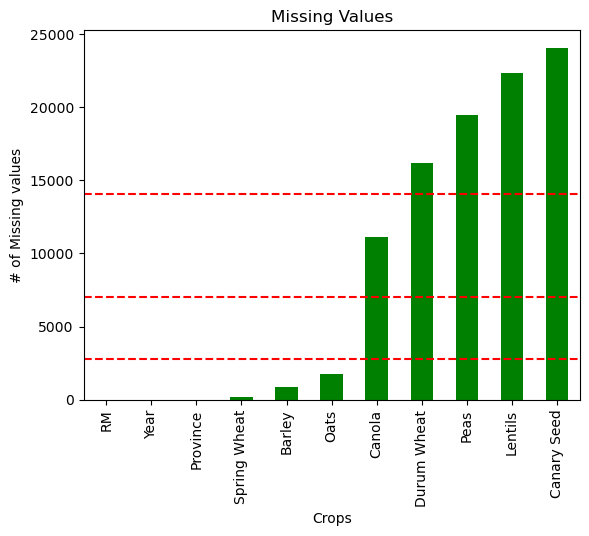

In [45]:
df.isna().sum().sort_values().plot(kind='bar', color='green')
plt.title('Missing Values')
plt.xlabel('Crops')
plt.ylabel('# of Missing values')
plt.axhline(len(df)/2, linestyle='--', color='red')
plt.axhline(len(df)/4, linestyle='--', color='red')
plt.axhline(len(df)/10, linestyle='--', color='red')
plt.show()


## Outliers

In [49]:
crop_columns=['Canola', 'Barley', 'Canary Seed', 'Durum Wheat',
       'Lentils', 'Oats', 'Spring Wheat', 'Peas']

## Histograms

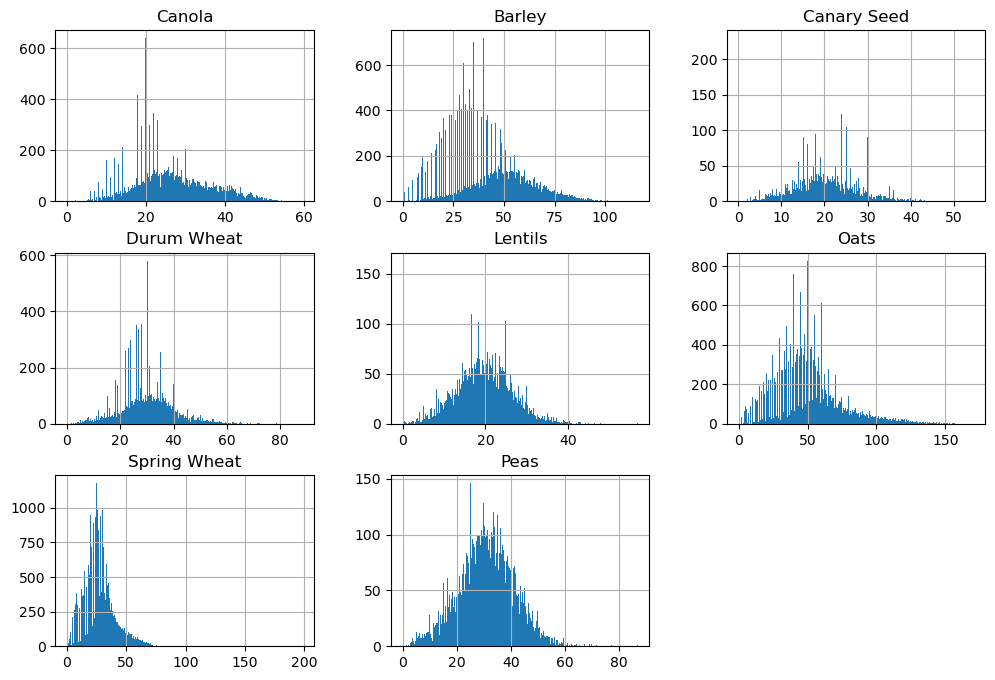

In [64]:
df[crop_columns].hist(bins=300)
plt.show()

## Boxplots

<AxesSubplot:>

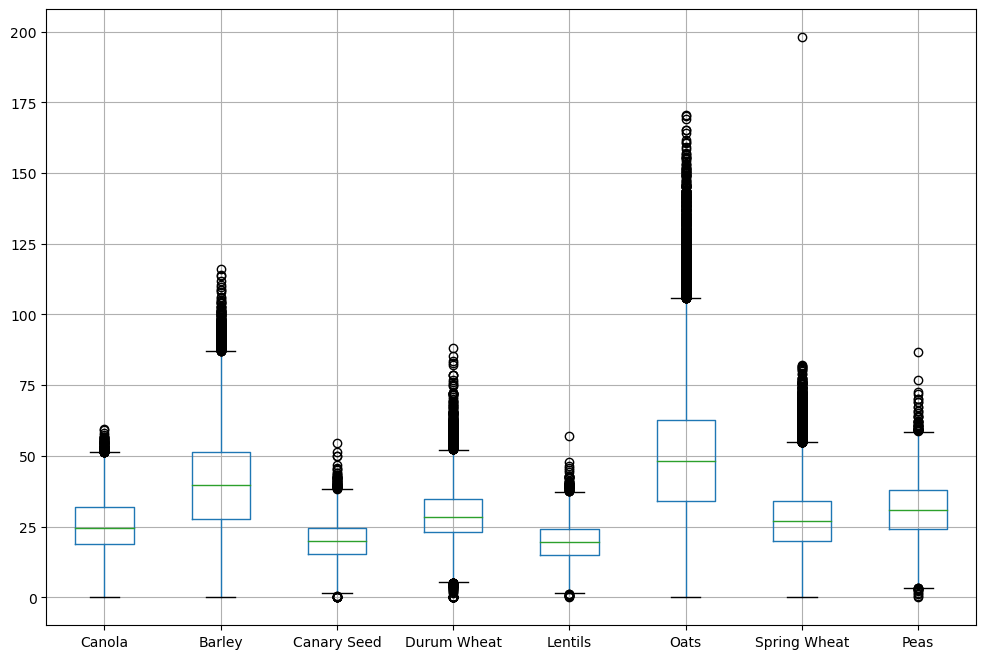

In [65]:
df[crop_columns].boxplot()

In [67]:
df.loc[df['Spring Wheat']>180]

,RM,Year,Canola,Barley,Canary Seed,Durum Wheat,Lentils,Oats,Spring Wheat,Peas,Province
16215,314,2018,33.0,43.5,NaN,NaN,29.033333,41.0,198.0,35.0,SK


<AxesSubplot:>

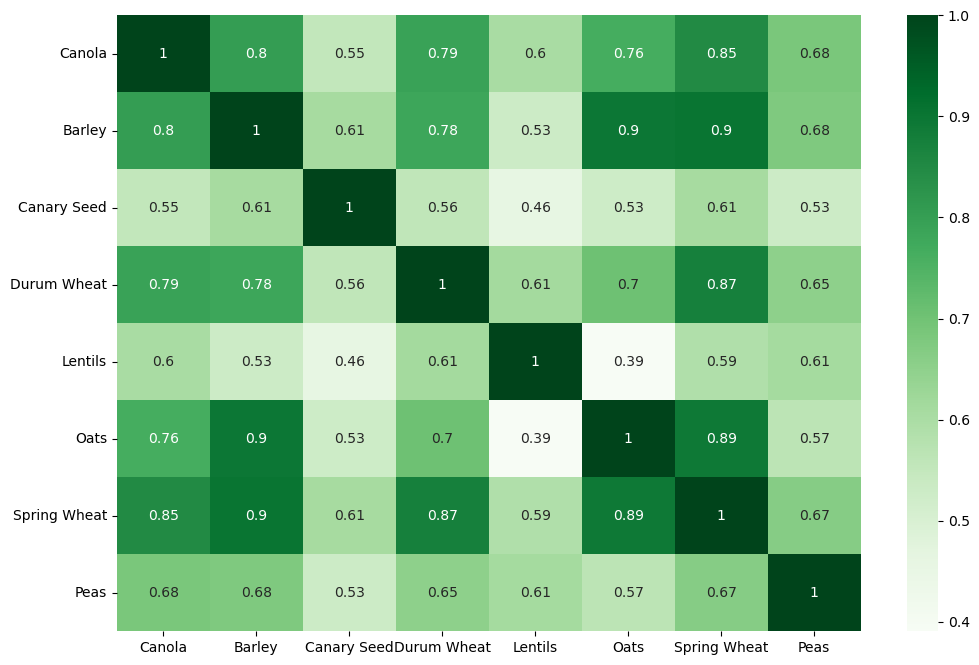

In [72]:
# Peorson Corr (-1 to 1), -1 negative corr, o no corr, 1 positive corr
# Using Seaborn
sb.heatmap(df[crop_columns].corr(),annot=True, cmap='Greens')


## GIS Analyis

In [173]:
# CRS --> Cordinate Reference Systems
gdf_mb['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [174]:
# Standardazing CRS formats
gdf_sk['geometry']=gdf_sk['geometry'].to_crs('epsg:4326')
gdf_mb['geometry']=gdf_mb['geometry'].to_crs('epsg:4326')

In [175]:
gdf_sk['RMNO']=gdf_sk['RMNO'].astype(int)

In [176]:
#set(gdf['RM'].unique()) - set(df_sk_clean['RM'].unique())

In [177]:
gdf_mb['MUNI_NAME']=gdf_mb['MUNI_NAME'].str.replace('RM OF ','')

In [178]:
gdf=pd.concat([gdf_sk[['RMNO','geometry']].rename(columns={'RMNO':'RM'}),gdf_mb[['MUNI_NAME', 'geometry']].rename(columns={'MUNI_NAME':'RM'})])

In [179]:
# gdf.plot()not interactive
# gdf.explore()

In [180]:
gdf['RM']=gdf['RM'].astype('string')
df['RM']=df['RM'].astype('string')

In [181]:
df_gdf=pd.merge(gdf, df, on='RM')

In [182]:
print('Before merging', gdf['RM'].nunique())
print('After merging',df_gdf['RM'].nunique())

Before merging 481
After merging 352


<AxesSubplot:>

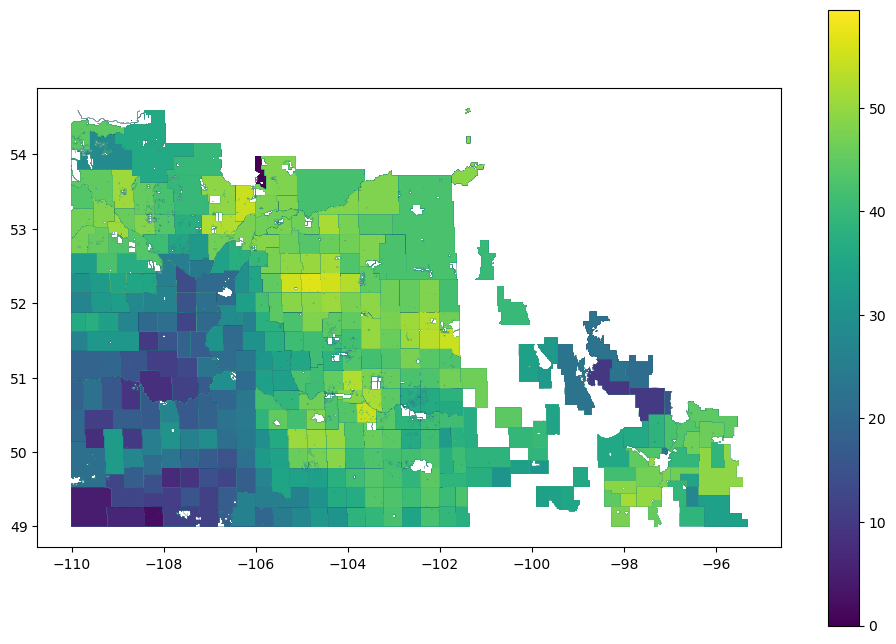

In [183]:
df_gdf.plot(column='Canola', legend=True)

In [191]:
ds=df_gdf.copy()

### GIS Visualization

#### Explore functiom

In [218]:
m=ds.loc[ds['Year']==2021].explore(column='Canola', 
                                 legend=True,  
                                 cmap='Greens',
                                 tooltip= ['Canola', 'RM'],
                                 tiles='Stamen Toner') # Plot() is good for showing up in GitHub, Explore() is good for interactive map and saving as HTML

# Adding a title with dark orange color to the folium map
title_html = '''
                 <h3 align="center" style="font-size:30px; color:Green;"><b> Canola Yield in 2021 </b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
m.save('/users/ruhidmirzayev/Palette/Canola_2021.html')

#### Plot

<AxesSubplot:>

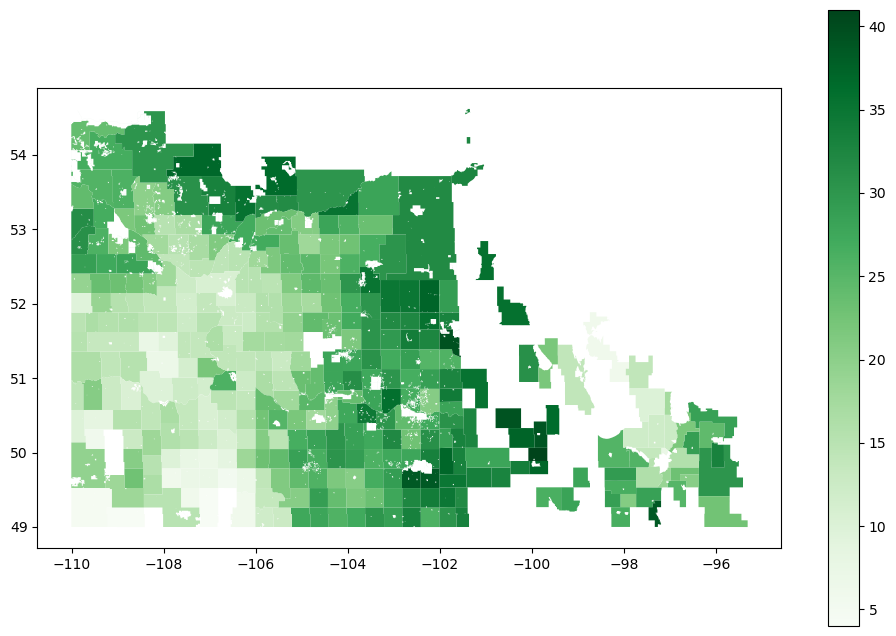

In [214]:
ds.loc[ds['Year']==2021].plot(column='Canola', 
                                 legend=True,  
                                 cmap='Greens')

## Tableau

In [220]:
# Saving it to local file

df_gdf.to_file('your/local/file/Crops_Yield_1938_2022.shp')

/var/folders/gq/w27c8tf566sgn4w3l9xyrhdm0000gn/T/ipykernel_36605/3445646582.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_gdf.to_file('/Users/ruhidmirzayev/Palette/Data/Crops_Yield_1938_2022.shp')
